## **K-NN k-nearest neighbor**
### i) supervised machine learning algorithm
  

  training set: labeled input


  test set: unlabeled data
### ii)steps:
  

  Data prepocessing: features, labels



  Divide training set, test set(without label)


  Calculate distance between test sample and each training set sample.


  Set K value.


  Count the number of occurrences of each class of the top K neighbor sample. 


  Make prediction of class of the test sample. 

### **Import Libraries**:

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### **Loading Dataset**:

In [31]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
import pandas as pd 
data=pd.read_csv('/content/gdrive/MyDrive/machine learning/diabetes.csv')

In [33]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **DataSet Description:**


Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test


BloodPressure: Diastolic blood pressure (mm Hg)


SkinThickness: Triceps skinfold thickness (mm)


Insulin: 2-Hour serum insulin (mu U/ml)


BMI: Body mass index (weight in kg/(height in m)^2)


Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.


Age: Age in years


Class: Class variable (0: the person is not diabetic or 1: the person is diabetic

In [34]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




*   The average number of Pregnancies are 4.
*   Glucose, BloodPressure, SkinThickness, and Insulin have minimum values as 0 which seems like an error and should be explore later.
*   Pregnancies, SkinThickness, Insulin and Age have major difference between 75% and maximum value. This represent the chances of outliers in the data.


### **Zero_data replacement**:

0 ---> MaN ----> mean of the col

In [35]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
  ## panads data fram always has a col name. (First line)
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [36]:
# Get all the data in the first eight columns
X = data.iloc[:,0:8]
### print(X)

In [37]:
# label
y = data.iloc[:,8]
###print(y)

### **Plot heatmap and find linear correlated features.**

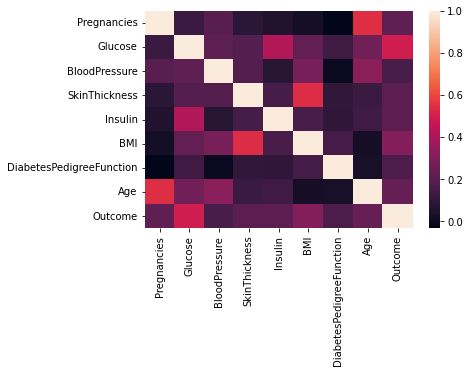

In [38]:
sns.heatmap(data.corr())

### **Split training and teseing set**:

In [39]:
#import train_test_split from sklearn
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [49]:
#Create KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)


In [44]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[128  29]
 [ 35  39]]
0.5492957746478873


In [45]:
print(accuracy_score(y_test,y_pred))

0.7229437229437229


In [58]:
acc = np.zeros((19,2))
for i in range (2,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  acc[i-2] = (i,accuracy_score(y_test,y_pred))
print(acc)

[[ 2.          0.6969697 ]
 [ 3.          0.70562771]
 [ 4.          0.72294372]
 [ 5.          0.72294372]
 [ 6.          0.70562771]
 [ 7.          0.72294372]
 [ 8.          0.74891775]
 [ 9.          0.74458874]
 [10.          0.74025974]
 [11.          0.72727273]
 [12.          0.74025974]
 [13.          0.73593074]
 [14.          0.73593074]
 [15.          0.75324675]
 [16.          0.74891775]
 [17.          0.74458874]
 [18.          0.74891775]
 [19.          0.74891775]
 [20.          0.74458874]]


Text(0.5, 1.0, 'acc with different K')

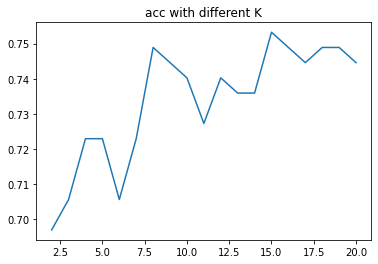

In [60]:
xs = [x[0] for x in acc]
ys = [x[1] for x in acc]
plt.plot(xs, ys)
plt.title('acc with different K')